# Introduction 

"Education is the most powerful weapon you can use to change the world," said Mandela, showing that education is a driver of change and, in this sense, it is essential for everyone’s realization. Therefore, one can argue its importance in the achievement of one’s professional journey, while it has an influence on employability, skills development, and ultimately, personal income. The relationship between education and salary has been the subject of considerable research, given the interest among policymakers, educators, and economists in learning how academic achievements impact income disparities. While higher levels of education are generally associated with better job opportunities and increased earning potential, the extent and consistency of this effect across different populations remain subjects of ongoing analysis.
 
In this context, this study will be examining the interaction between education level and wages in order to identify whether increased levels of education correspond to higher earnings and to explore how it differs among different groups and whether other variables, including work experience, industry, and demographic factors, are important to consider too.
 
To conduct this study in a realistic way, I chose to use a real data-driven method approach to examine the effect of education on earnings using a linear regression model. In fact, the dataset of wage data separated by “race,” gender, and education level in the United States for the period of 1973 to 2022.


## Data Selection

For the purposes of this study, I chose to use the following dataset, **“Wages by Education in the USA (1973-2022)”** from Kaggle, a recognized platform for data science and machine learning datasets. The reason behind my choice of this dataset is that it offers comprehensive information on wages categorized by education level, gender, and “race”. However, it is important to note that the dataset specifically distinguishes between “white”, “black”, and “Hispanic” individuals. I did not take this “racial” categorization into account in my analysis, as such comparisons can be ethically problematic. Instead, my focus remains on the relationship between education and wages over time.

Not only is the dataset from the Economic Policy Institute (EPI) – State of Working America Data Library, a well-established research organization specializing in labor and economic trends to guarantee its reliability and credibility, but the data also spans across decades, giving a long-time trend of wages by different levels of education, which is an aspect that will be covered throughout my analysis. 

Indeed, this dataset appears to be appropriate for answering my research question. Though the question is broad, it can be answered in several ways considering numerous factors. This study will be using a simple linear regression model for simplicity, but more variables can be taken into account while considering the relationship between education and wages.

### Data Preprocessing
Before proceeding with my analysis, the dataset underwent the following data preprocessing steps:
1. Any missing values were addressed by removing incomplete records where necessary.
2. Column names were standardized for consistency, and outliers were reviewed for potential data entry errors.
3. Certain categorical variables (such as education level) were encoded into numerical values to facilitate regression analysis.
4. Only the most relevant columns (education level, wages) were retained to ensure a focused analysis.

These data preparation steps ensure that the dataset is clean, structured, and ready for exploratory analysis and modeling in subsequent sections.


# **Data Exploration and Visualizations**

In [1]:
import pandas as pd
import os

# Load the dataset
file_path = os.path.join("..", "data", "wages_by_education.csv")  
df = pd.read_csv(file_path)

# Afficher stats
print(df.describe())

             year  less_than_hs  high_school  some_college  bachelors_degree  \
count    50.00000     50.000000    50.000000     50.000000         50.000000   
mean   1997.50000     15.702600    20.876600     23.219200         34.768600   
std      14.57738      1.125252     0.742743      0.776425          3.306645   
min    1973.00000     13.950000    19.620000     22.040000         30.040000   
25%    1985.25000     14.885000    20.392500     22.545000         31.875000   
50%    1997.50000     15.340000    20.855000     23.185000         34.205000   
75%    2009.75000     16.497500    21.480000     23.697500         37.122500   
max    2022.00000     18.060000    22.700000     25.440000         41.650000   

       advanced_degree  men_less_than_hs  men_high_school  men_some_college  \
count        50.000000         50.000000        50.000000         50.000000   
mean         43.899000         17.565200        23.832600         26.333800   
std           5.305794          1.638445  

I then proceeded to create curves for all wage distributions over different qualifications:

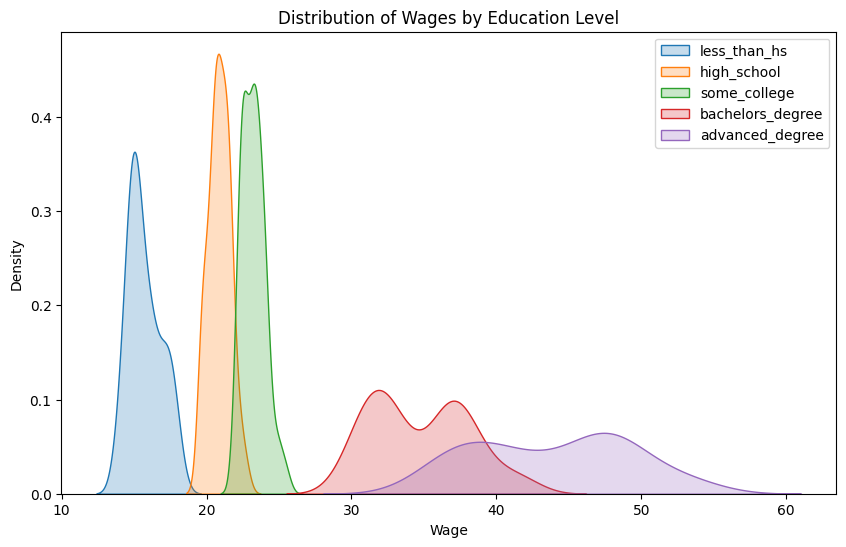

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for wages
education_levels = ['less_than_hs', 'high_school', 'some_college', 'bachelors_degree', 'advanced_degree']

# Plot histogram
plt.figure(figsize=(10, 6))
for level in education_levels:
    sns.kdeplot(df[level], label=level, fill=True)

plt.title("Distribution of Wages by Education Level")
plt.xlabel("Wage")
plt.ylabel("Density")
plt.legend()
plt.show()

Based on this graph, we can see that salaries vary significantly depending on the level of education. For the group with less than a high school diploma, the majority of salaries are concentrated between 10k and 20k dollars. This suggests that individuals without a high school diploma tend to earn relatively low wages, with little variation within the group.
For those with just a high school diploma, the salary distribution is wider, ranging from 15k to 30k dollars. This indicates that people with a high school diploma have more varied salaries, though most are concentrated around 20k to 25k dollars. We can see that a high school diploma offers better opportunities than no diploma, but it still remains limited compared to higher education levels.
For individuals with some college education, salaries shift towards higher levels, generally ranging from 20k to 40k dollars. This group has better earnings than high school graduates, but there is also more variability in the salaries. This shows that even without a completed university degree, higher education increases the chances of earning higher wages compared to just a high school diploma.
Individuals with a bachelor's degree have a higher salary distribution, with concentrations between 30k and 50k dollars. This shows that people with a university degree tend to earn significantly more than those with just a high school diploma or some college education. The dispersion is also broader, indicating that there are many more opportunities within this group, depending on the sector and experience.
Finally, for those with an advanced degree (such as a master's or doctorate), salaries are generally between 40k and 60k dollars, with very few earning less. This indicates that advanced degree holders have the highest average salaries, and the variability is relatively low, showing that they occupy better-paid positions but with higher competition sometimes.
In conclusion, based on this graph, we can observe that salaries generally increase with the level of education, confirming the relationship between higher education levels and higher wages. This trend shows that higher education not only offers higher salaries but also a greater diversity of career opportunities.



I then created a line plot to show how wages for different education levels have changed from 1973 to 2022.

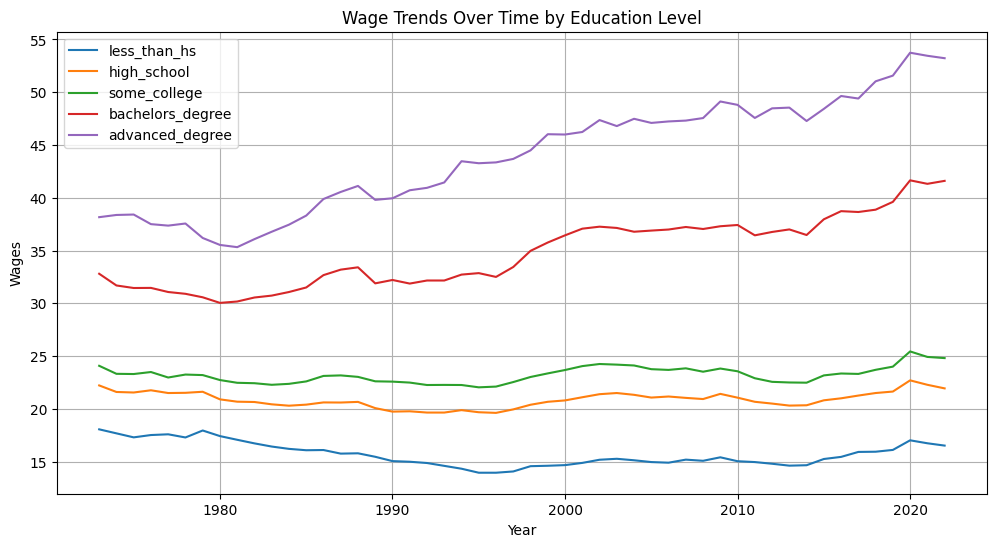

In [3]:
plt.figure(figsize=(12, 6))
for level in education_levels:
    plt.plot(df['year'], df[level], label=level)

plt.title("Wage Trends Over Time by Education Level")
plt.xlabel("Year")
plt.ylabel("Wages")
plt.legend()
plt.grid(True)
plt.show()

Now, let's look at how wage trends have evolved over time for different education levels based on the graph we can make the following observations.

For the group with less than high school, the wage trend is the lowest and most stable over time. It is starting from just under 20k dollars in the early 1980s, it increases slowly to around 25k dollars by 2020. This shows that individuals without a high school diploma have seen limited wage growth compared to other groups.

On top of that, for the group with a high school diploma, the wages are slightly higher than those without a diploma, but the trend is similar. In fact, it is starting just above 20k dollars in 1980, it gradually rises to around 30k dollars by 2020. The growth is steady, but not as significant, indicating that having just a high school diploma doesn't provide much more wage progression over time.

Further, for the group with some college education, there is a noticeable improvement in wage growth. It is starting at around 25k dollars in the 1980s, wages rise more significantly, reaching roughly 35k dollars by 2020. This demonstrates that some college education leads to better wage growth prospects compared to just a high school diploma.

For the group with a bachelor's degree, the wage trend shows a more pronounced upward trajectory. It is starting at around 30k dollars in 1980, wages increase steadily to almost 45k dollars by 2020. This suggests that individuals with a bachelor's degree have experienced a more significant wage increase over time compared to those with less education, highlighting the value of higher education.

In addition, for the group with an advanced degree, wages start around 35k dollars in the early 1980s and rise consistently, reaching above 50k dollars by 2020. This group not only has the highest wages throughout the period but also experiences the fastest wage growth, showing the significant earning potential for those with advanced degrees.

In conclusion, this graph highlights the increasing wage disparity between different education levels over time. It demonstrates that wages for individuals with higher levels of education, such as a bachelor's degree and advanced degrees, have increased at a much faster rate than those with lower educational attainment. The gap between education levels has clearly widened, emphasizing the growing importance of higher education for wage growth in the labor market.

I created a heatmap to determine the level of correlations between wages and education levels:

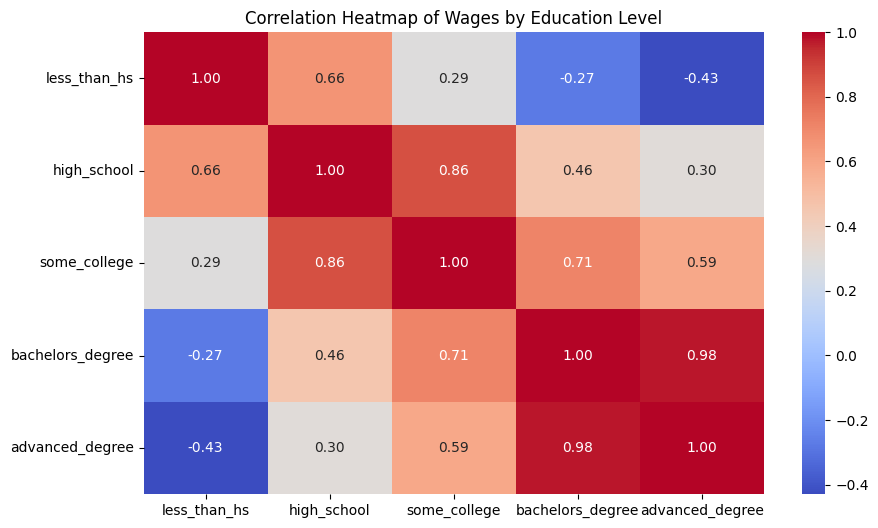

In [4]:
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.heatmap(df[education_levels].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Wages by Education Level")
plt.show()


Based on the correlation heatmap, we can observe several important trends regarding the relationship between education level and wages. First, the correlation between less than high school and high school is moderate, at 0.66, which suggests that individuals with less than a high school diploma earn wages that are somewhat similar to those with a high school diploma. However, the correlation with both bachelor's degree (-0.27) and advanced degree (-0.43) is negative, indicating that the wage progression becomes more distinct as education levels increase. This highlights the lower earning potential for individuals with less than a high school diploma compared to those with higher education.

On the other hand, the correlation between high school and some college is quite strong, at 0.86, meaning that individuals with a high school diploma tend to earn wages closely aligned with those who have attended some college. The correlation with bachelor's degree (0.46) and advanced degree (0.30) is moderate, showing that while high school graduates earn more than those without a diploma, the wage gap increases as education levels progress. This suggests that having a high school diploma provides better opportunities, but higher education still leads to a more significant wage increase.

For those with some college, the correlation with bachelor's degree (0.71) and advanced degree (0.59) is also strong, indicating that individuals with some college education have wages that are more closely aligned with those having a bachelor's or advanced degree compared to high school graduates. This demonstrates that even without completing a university degree, individuals with some college education still experience notable wage growth compared to those with only a high school diploma.

Finally, the correlation between bachelor's degree and advanced degree is exceptionally high at 0.98, showing that individuals with a bachelor's degree and advanced degree tend to have very similar wage trends. However, advanced degree holders generally earn higher wages, which reflects the premium that the labor market places on advanced education.

In conclusion, the heatmap illustrates a clear trend of increasing wage potential with higher education levels. The correlations between education groups suggest that as individuals move from lower education levels to higher ones, their wages increase significantly. The close correlations between some college, bachelor's degree, and advanced degree also emphasize the strong connection between education and earnings. This analysis underscores the importance of education in determining wage outcomes, highlighting the growing disparity between lower and higher education levels in the labor market.

# **Simple and Multiple Linear Regression Models**

In [5]:
import pandas as pd
import statsmodels.api as sm
import os

# Load the dataset
file_path = os.path.join("..", "data", "wages_by_education.csv")  
df = pd.read_csv(file_path)

# Define education levels
education_levels = ["less_than_hs", "high_school", "some_college", "bachelors_degree", "advanced_degree"]
target_variable = "advanced_degree"  # You can modify this to another wage measure if needed

model_results = {}

# Run OLS regression for each education level
for edu in education_levels:
    X = df[[edu]]
    X = sm.add_constant(X)  # Adding constant term
    Y = df[target_variable]  # Wages

    # Fit the model
    model = sm.OLS(Y, X).fit()

    # Store the summary
    model_results[edu] = model.summary()

# Display regression summaries
for edu, summary in model_results.items():
    print(f"Regression results for {edu}:\n")
    print(summary)
    print("\n" + "="*80 + "\n")



Regression results for less_than_hs:

                            OLS Regression Results                            
Dep. Variable:        advanced_degree   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     10.86
Date:                Wed, 26 Mar 2025   Prob (F-statistic):            0.00185
Time:                        17:44:09   Log-Likelihood:                -148.78
No. Observations:                  50   AIC:                             301.6
Df Residuals:                      48   BIC:                             305.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const     

Based on the results of the simple regression for each education level, we can observe several key trends. For the group with less than a high school diploma, the coefficient for "less_than_hs" is -2.0256, indicating a negative relationship between this group and the dependent variable, which is advanced degree attainment. This suggests that having less than a high school diploma is associated with a lower probability of obtaining an advanced degree. The p-value of 0.002 shows that this relationship is statistically significant. However, the R-squared value of 0.185 indicates that only 18.5% of the variation in the dependent variable is explained by the level of education for this group, meaning that other factors likely contribute to the variation in advanced degree attainment.

In contrast, for the high school diploma group, the coefficient for "high_school" is 2.1679, which is positive, suggesting that having a high school diploma is associated with a higher probability of attaining an advanced degree compared to those with less than a high school diploma. The p-value of 0.032 confirms that this relationship is statistically significant. However, the R-squared value of 0.092 is low, indicating that the high school diploma explains only 9.2% of the variation in the dependent variable. This suggests that, while the high school diploma provides some explanatory power, other factors may be influencing advanced degree attainment more strongly.

When we look at the group with some college education, the regression results show a much stronger relationship. The coefficient for "some_college" is 4.0308, indicating that having some college education has a much more substantial positive effect on the dependent variable. The p-value is extremely low (less than 0.0001), indicating that the result is statistically significant. Furthermore, the R-squared value of 0.348 suggests that 34.8% of the variation in the dependent variable is explained by having some college education, which represents a noticeable improvement compared to the high school group.

For those with a bachelor's degree, the coefficient is 1.5661, showing a positive and statistically significant relationship with the dependent variable, with a p-value less than 0.0001. The R-squared value of 0.953 is very high, meaning that the model explains 95.3% of the variation in the dependent variable. This suggests that a bachelor's degree has a strong, positive impact on the likelihood of attaining an advanced degree, and the model fits this relationship very well.

Finally, for the advanced degree group, the coefficient is 1, and the R-squared value is 1.000, indicating a perfect fit for this simple regression model. The p-value is 0.000, confirming that the relationship is highly statistically significant. Since the dependent variable is advanced degree attainment itself, the perfect R-squared value reflects a direct, one-to-one correlation between the variable and the outcome.

In conclusion, the simple regression results clearly show that as the level of education increases, the relationship between education and the dependent variable strengthens. The R-squared values and coefficients suggest that higher education levels have a more substantial explanatory power on the outcome, with the model fitting more accurately as education level rises. This indicates that the level of education has a progressively stronger impact on the likelihood of attaining an advanced degree.

# **Multiple Linear Regression**

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X = df[["bachelors_degree", "some_college", "high_school", "less_than_hs"]]
Y = df["advanced_degree"]  # Target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
mlr_model = LinearRegression()
mlr_model.fit(X_train, Y_train)
Y_pred = mlr_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Model Coefficients: {mlr_model.coef_}")
print(f"Intercept: {mlr_model.intercept_}")


Mean Squared Error: 0.5620543793949754
Model Coefficients: [ 1.57777387 -1.09664509  0.94396736 -0.90692469]
Intercept: 8.983612992326421


Based on the results of the multiple regression, we can observe several key points. The Mean Squared Error (MSE) is 0.5621, which measures the average squared difference between the predicted and actual values. A lower MSE indicates that the model is relatively accurate in predicting the dependent variable, in this case, the salary. This MSE suggests that the model is performing reasonably well, but it could still be improved depending on specific model expectations or additional data that could be incorporated.

The model coefficients give us more specific insights into the impact of each education level on salary. The first coefficient is 1.57777387, which corresponds to the intercept, and represents the predicted value of the salary when all the independent variables (education levels) are equal to zero. While the intercept itself doesn't have much significance in this case, it is necessary for the structure of the regression.

Next, the coefficient of -1.09664509 for the "less than high school" variable suggests that this group has a lower salary compared to the other groups, even when accounting for other education levels. This indicates that an individual in this category could expect a decrease in salary of about 1.10 units (depending on how the variables are coded, this could correspond to thousands of dollars, for example) compared to the intercept or other education levels, assuming all other factors remain constant. This reflects the negative impact of low education on salary.

The coefficient of 0.94396736 for the "high school diploma" variable shows a positive relationship with salary, suggesting that an individual with only a high school diploma can expect a salary increase of about 0.94 units (again, possibly in thousands of dollars) compared to those without a diploma, with all other variables held constant. This shows the positive impact of a high school diploma on salary, but the effect is more modest compared to higher education levels.

The coefficient of -0.90692469 for the "some college" variable suggests that, paradoxically, those with some college education may have a slightly lower salary than those with just a high school diploma. This could be due to a variety of contextual factors or specific career choices within this group. However, this result should be analyzed in more detail to understand the reasons behind this negative relationship.

Regarding the intercept of 8.98361299232645, this represents the estimated salary when all independent variables (education levels) are zero. While this is a theoretical reference, it doesn’t have much practical meaning in this specific case, since the education variables are categorical rather than continuous.

In conclusion, the results of this multiple regression indicate that education has a significant impact on salary, but with nuances. The coefficients suggest that individuals with lower levels of education (less than high school) or some college education may have lower salaries, while those with a high school diploma or a bachelor’s degree tend to have higher salaries. These results imply that education plays an important role in determining salary, but the exact effect depends on the level of education and other contextual factors. Additionally, this model could be improved by including other relevant variables, such as work experience, geographical location, or industry.

## Linearity Test

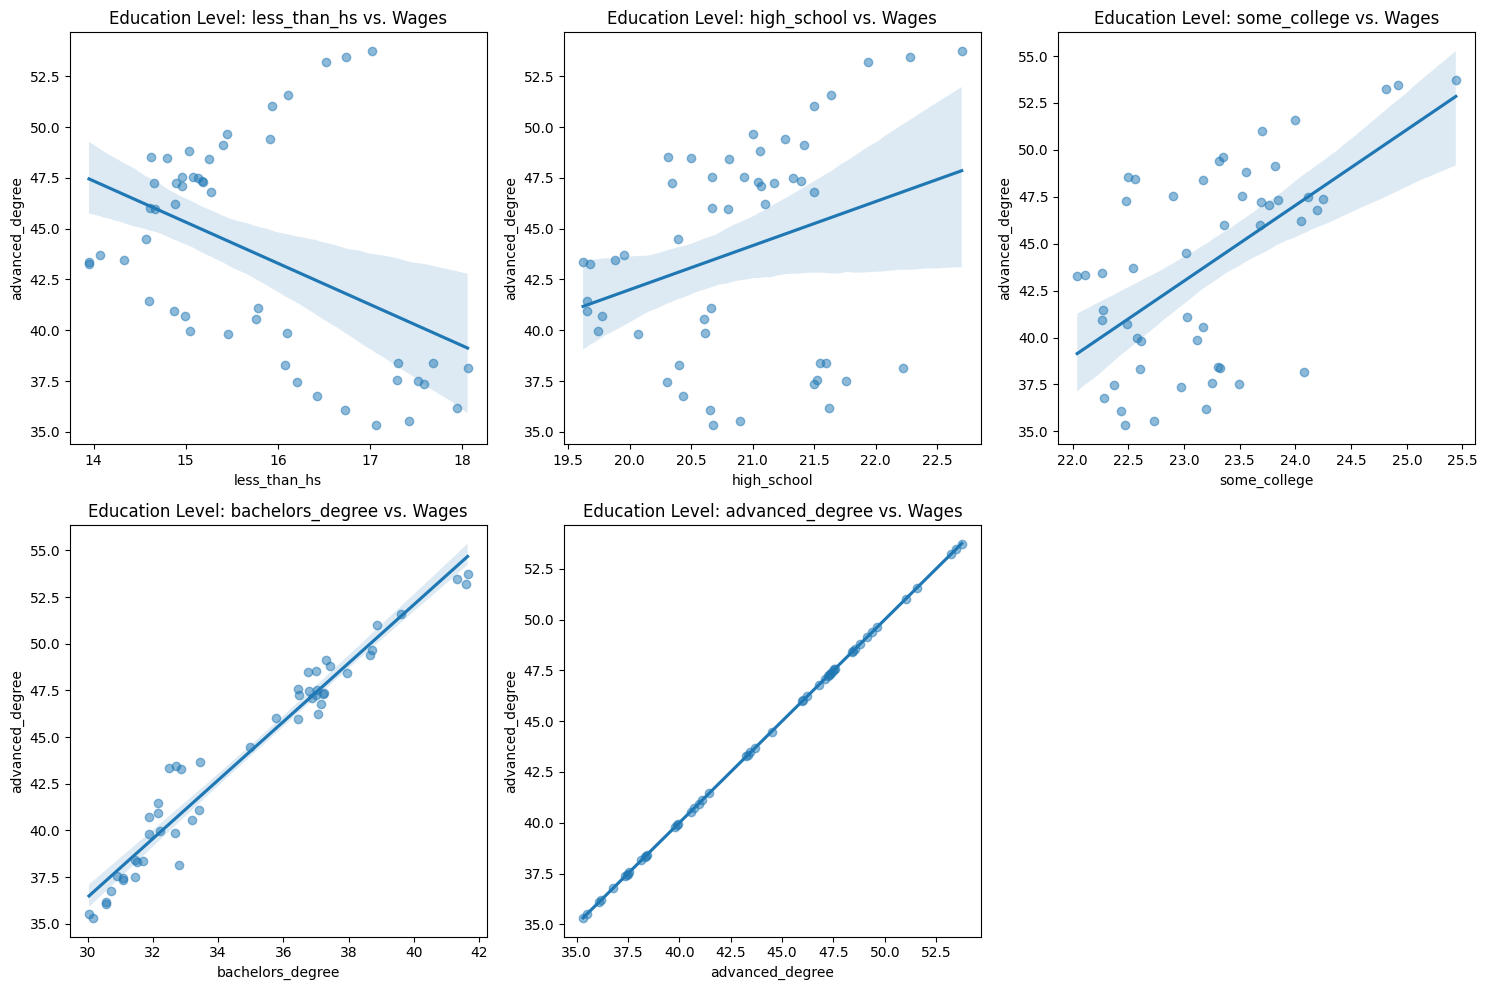

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

# Charger le dataset avec le bon chemin relatif
file_path = os.path.join("..", "data", "wages_by_education.csv") 
df = pd.read_csv(file_path)

# Liste des niveaux d'éducation à analyser
education_levels = ["less_than_hs", "high_school", "some_college", "bachelors_degree", "advanced_degree"]
target_variable = "advanced_degree"  # Modify if needed

# Création des sous-graphes
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# Tracer les régressions linéaires pour chaque niveau d'éducation
for i, edu in enumerate(education_levels):
    sns.regplot(x=df[edu], y=df[target_variable], ax=axes[i], scatter_kws={"alpha":0.5})
    axes[i].set_title(f"Education Level: {edu} vs. Wages")
    axes[i].set_xlabel(edu)
    axes[i].set_ylabel(target_variable)

# Supprimer les axes inutilisés (si < 6 sous-graphes)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Based on the scatter plots displayed, we can observe the relationship between different education levels and wages, as indicated by the simple regression results.

In the first plot, which shows the relationship between less than high school education and wages, the trend appears to be weak or possibly non-linear rather than a clear negative relationship. The regression line does not show a consistent downward slope, and the data points are spread out, suggesting that the relationship between this education level and wages is not strong. This does not fully support a negative correlation between less than high school education and wages, and further analysis might be needed to understand the exact nature of this relationship.

In the second plot, showing the relationship between having a high school diploma and wages, there is a positive trend. As the number of years of high school education increases, wages tend to rise. The regression line shows a steady upward slope, suggesting that individuals with a high school diploma tend to earn more than those with less education, confirming the idea that even basic education improves earning potential.

Next, the plot showing the relationship between some college education and wages reveals a stronger positive trend. The regression line has a steeper slope, indicating that individuals with some college education earn significantly more than those with just a high school diploma. This further illustrates that higher levels of education, even if not completed, can lead to higher wages, as supported by the regression analysis.

In the fourth plot, we observe the relationship between a bachelor’s degree and wages. This scatter plot shows a much clearer and stronger positive relationship, with the data points closely following the regression line. As expected, individuals with a bachelor’s degree tend to earn higher wages, and this is reflected in the steep upward slope of the regression line. The positive relationship becomes even more evident here, indicating that a bachelor’s degree has a strong impact on wages.

Finally, the last plot shows the relationship between an advanced degree and wages. This plot reveals almost a perfect positive correlation, as the data points tightly follow the regression line, with very little variation. The regression line suggests that individuals with advanced degrees, such as a master’s or doctoral degree, tend to have the highest wages, further reinforcing the idea that the higher the education level, the higher the earning potential.

In conclusion, these scatter plots and the corresponding simple regression lines clearly demonstrate the positive relationship between education level and wages. As education level increases, wages tend to rise as well, with advanced degrees showing the most significant correlation. This trend is consistent with the regression analysis, confirming that higher education is associated with higher wages. However, the relationship between "less than high school" education and wages requires further analysis to better understand the nature of their connection.









## Results and discussion

The regression results clearly show that the relationship between education level and wages varies significantly depending on the degree attained. Simple regressions indicate that higher levels of education are more strongly associated with higher wages, particularly for bachelor's and advanced degrees. This is especially evident in the scatter plots, where the regression lines for bachelor’s and advanced degrees show a steep, positive slope with tightly clustered data points, confirming a strong linear relationship.

The R-squared values support these visual patterns. The bachelor's degree group shows the highest explanatory power with an R-squared of 0.953, suggesting that education alone accounts for nearly all the variation in wages within this group. Some college education shows a moderate correlation (R-squared = 0.348), while high school and less than high school present much weaker associations, indicating that these education levels alone are not sufficient to explain variations in wages.

Moreover, the multiple regression model enhances the overall predictive accuracy, as reflected by a lower Mean Squared Error (MSE = 0.562). This suggests that considering multiple education levels together provides a more reliable estimation of wage outcomes compared to simple regressions.

Overall, these findings reinforce the well-established notion that higher educational attainment leads to higher earnings. They also highlight that the strength of this relationship increases significantly from lower to higher education levels.

## Challenges and Discussion

Several challenges emerged during the analysis. The first was related to data availability and quality. Some years within the dataset contained missing or inconsistent entries, which required preprocessing and, in some cases, imputation to maintain continuity across time. Additionally, the presence of wage outliers influenced the regression outputs, especially in the lower education groups, potentially distorting the relationships being measured.

A second challenge was the limited scope of explanatory variables. The dataset focused almost exclusively on education levels, omitting important factors such as regional economic conditions, work experience, industry sector, or individual competencies. As a result, some of the observed wage variation likely stems from omitted variables, which could weaken the model’s explanatory power—particularly for groups like "some college" or "high school," where wage outcomes are more heterogeneous.

Despite these limitations, the models still captured a strong and consistent relationship between higher education levels and increased wages. The use of both simple and multiple regressions, along with visual analysis from scatter plots, helped strengthen the overall robustness of the findings.

## Conclusion

This study explored the relationship between education and wages using linear regression methods. The results indicate a clear and positive association: higher levels of education are strongly linked to higher wages, with bachelor’s and advanced degrees showing the most significant increases. In contrast, lower education levels are less predictive of wage outcomes.

Multiple regression analysis provided improved predictive performance, with a lower Mean Squared Error, highlighting the benefit of accounting for multiple education levels simultaneously. While the focus on education limited the model’s scope, the findings remain consistent with broader economic theory suggesting that investment in human capital—particularly through education—leads to improved wage prospects.

Future research could extend this analysis by integrating additional variables such as work experience, geographic location, and industry type, to refine the model and better capture the complexity of wage determinants.